In [ ]:
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 41.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.5

In [ ]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
review_data= pd.read_csv("prepro.csv")
print(review_data.head(2))
print(len(review_data))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                              Review Polarity_score
0  Dr. Meadows made me feel comfortable upon our ...       POSITIVE
1  Helen is amazing, she helped me open doors tha...       POSITIVE
107224


In [ ]:
lis = []
for ind in review_data.index:
  if (review_data['Polarity_score'][ind] == 'NEGATIVE'):
    lis.append(review_data['Review'][ind])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['I love my therapist. took me a few tries to find her through the app. I am however not as impressed with the tech. the video is choppy and sometimes doesnt let me log in. Also, there arent any discounts available to refer friends, which seems like a good idea. I was not able to help a couple friends who needed it at a lower rate. I received it during a promotion. And lastly, I havent been able to find out how to pause service to save on weeks not utilized. If these issues were addressed, it would really be a superb app that I would definitely refer.',
 "Usually therapy is stressful and feels like homework and I feel like I disappoint my therapists. Anita doesn't stress me out. She doesn't make me feel like I owe her anything. She encourages me when im taking steps towards better health, and consoles me when I mess up",
 "She's knowledgeable, empathetic, and doesn't give pat answers.",
 'She gets me me and I am a complicated mess',
 "She has mad it easyer for me to talk about thing i 

In [ ]:
len(lis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


174

In [ ]:
review_data = pd.DataFrame(lis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_data['Review'] = review_data[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,Review
0,I love my therapist. took me a few tries to fi...,I love my therapist. took me a few tries to fi...
1,Usually therapy is stressful and feels like ho...,Usually therapy is stressful and feels like ho...
2,"She's knowledgeable, empathetic, and doesn't g...","She's knowledgeable, empathetic, and doesn't g..."
3,She gets me me and I am a complicated mess,She gets me me and I am a complicated mess
4,She has mad it easyer for me to talk about thi...,She has mad it easyer for me to talk about thi...
...,...,...
169,Kelsi Yonting was able to help identify underl...,Kelsi Yonting was able to help identify underl...
170,I hate talking to people. Literally anyone who...,I hate talking to people. Literally anyone who...
171,This counselor is horrible! He wanted me to f...,This counselor is horrible! He wanted me to f...
172,I don't know how I would have made it these la...,I don't know how I would have made it these la...


In [ ]:
def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text2.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('stopwords') # run this one time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
review_data.dropna(axis = 0, how ='any',inplace=True)

review_data['Review'] = review_data['Review'].apply(clean_text)
review_data['Num_words_text'] = review_data['Review'].apply(lambda x:len(str(x).split()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
review_data['Review']=review_data['Review'].apply(remove_stopwords)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,Review,Num_words_text
0,I love my therapist. took me a few tries to fi...,love therapist took tries find however impress...,57
1,Usually therapy is stressful and feels like ho...,usually therapy stressful feels like homework ...,28
2,"She's knowledgeable, empathetic, and doesn't g...",shes knowledgeable empathetic doesnt give answers,6
3,She gets me me and I am a complicated mess,gets complicated mess,3
4,She has mad it easyer for me to talk about thi...,easyer talk thing dont like talking,8
...,...,...,...
169,Kelsi Yonting was able to help identify underl...,kelsi yonting able help identify underlying pr...,13
170,I hate talking to people. Literally anyone who...,hate talking people literally anyone person be...,19
171,This counselor is horrible! He wanted me to f...,counselor horrible wanted fill questionnaire s...,29
172,I don't know how I would have made it these la...,dont know would made last months without,9


In [ ]:
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2023-06-27 15:51:11.129145: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
2023-06-27 15:51:24.094472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
2023-06-27 15:51:53.282293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg

In [ ]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']):
       output = []
       for sent in texts:
             doc = nlp(sent)
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

text_list=review_data['Review'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


usually therapy stressful feels like homework feel like disappoint therapists anita doesnt stress doesnt make feel like anything encourages taking steps towards better health consoles mess
['therapy', 'stressful', 'homework', 'disappoint', 'therapist', 'step', 'well', 'health', 'console', 'mess']


In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=20,
                chunksize=200, passes=25,iterations=50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.023*"therapy" + 0.021*"time" + 0.019*"thing" + 0.014*"month" + 0.012*"appointment" + 0.012*"issue" + 0.012*"service" + 0.012*"counselor" + 0.011*"friend" + 0.010*"well"'),
 (1,
  '0.015*"counselor" + 0.015*"session" + 0.012*"therapist" + 0.010*"good" + 0.008*"counseling" + 0.008*"year" + 0.008*"message" + 0.008*"chat" + 0.008*"response" + 0.008*"experience"'),
 (2,
  '0.020*"counselor" + 0.017*"work" + 0.016*"good" + 0.013*"time" + 0.009*"email" + 0.009*"meeting" + 0.009*"appointment" + 0.009*"mind" + 0.009*"therapist" + 0.009*"first"'),
 (3,
  '0.041*"session" + 0.025*"time" + 0.022*"therapist" + 0.019*"problem" + 0.017*"help" + 0.013*"year" + 0.013*"life" + 0.012*"issue" + 0.010*"many" + 0.010*"thing"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.077691  0.073158       1        1  32.594273
0     -0.071091 -0.070983       2        1  25.753168
2      0.068492 -0.068831       3        1  21.982904
1      0.080290  0.066656       4        1  19.669655, topic_info=         Term       Freq      Total Category  logprob  loglift
55    session  25.000000  25.000000  Default  30.0000  30.0000
28    therapy  14.000000  14.000000  Default  29.0000  29.0000
124     month   6.000000   6.000000  Default  28.0000  28.0000
57       work  11.000000  11.000000  Default  27.0000  27.0000
46    problem  12.000000  12.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
59      point   1.478002   4.083911   Topic4  -5.2500   0.6097
54     mental   1.476341   9.706915   Topic4  -5.2512  -0.2572
413  schedule   1.474284   3.437300   Topic4  -5.2526   0.7796
304      much   1.473991   4.131859   Topic4  -5.2528   0.5953
0        able   1.473971   9.056511   Topic4  -5.2528  -0.1894

[254 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
448       3  0.734902   12day
0         1  0.441671    able
0         2  0.331253    able
0         3  0.110418    able
0         4  0.110418    able
...     ...       ...     ...
222       1  0.572063    year
222       2  0.190688    year
222       3  0.095344    year
222       4  0.190688    year
83        2  0.724316  youper

[324 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [ ]:

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -5.73407070081014

Coherence Score:  0.43675718003775704


In [ ]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


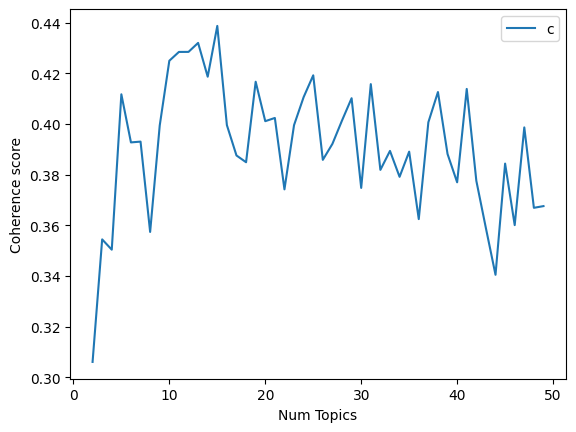

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3061
Num Topics = 3  has Coherence Value of 0.3544
Num Topics = 4  has Coherence Value of 0.3504
Num Topics = 5  has Coherence Value of 0.4117
Num Topics = 6  has Coherence Value of 0.3927
Num Topics = 7  has Coherence Value of 0.393
Num Topics = 8  has Coherence Value of 0.3574
Num Topics = 9  has Coherence Value of 0.3994
Num Topics = 10  has Coherence Value of 0.4249
Num Topics = 11  has Coherence Value of 0.4284
Num Topics = 12  has Coherence Value of 0.4284
Num Topics = 13  has Coherence Value of 0.432
Num Topics = 14  has Coherence Value of 0.4186
Num Topics = 15  has Coherence Value of 0.4387
Num Topics = 16  has Coherence Value of 0.3995
Num Topics = 17  has Coherence Value of 0.3875
Num Topics = 18  has Coherence Value of 0.3849
Num Topics = 19  has Coherence Value of 0.4167
Num Topics = 20  has Coherence Value of 0.4011
Num Topics = 21  has Coherence Value of 0.4023
Num Topics = 22  has Coherence Value of 0.3742
Num Topics = 23  has Co

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Select the model and print the topics
optimal_model = model_list[11]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.032*"time" + 0.018*"therapist" + 0.017*"work" + 0.015*"month" + 0.013*"issue" + 0.011*"talk" + 0.011*"session" + 0.011*"negative" + 0.011*"message" + 0.011*"therapy"'),
 (1,
  '0.019*"helpful" + 0.019*"person" + 0.019*"patient" + 0.019*"session" + 0.010*"robin" + 0.010*"foxman" + 0.010*"hope" + 0.010*"suggestion" + 0.010*"real" + 0.010*"passion"'),
 (2,
  '0.024*"therapist" + 0.023*"help" + 0.023*"right" + 0.021*"time" + 0.020*"session" + 0.017*"thing" + 0.015*"many" + 0.013*"issue" + 0.011*"expectation" + 0.010*"intense"'),
 (3,
  '0.035*"month" + 0.035*"last" + 0.012*"ptsd" + 0.012*"pleasant" + 0.012*"problem" + 0.012*"timely" + 0.012*"mental" + 0.012*"personal" + 0.012*"party" + 0.012*"complicated"'),
 (4,
  '0.042*"life" + 0.023*"counselor" + 0.022*"therapist" + 0.016*"well" + 0.013*"client" + 0.012*"friend" + 0.011*"relationship" + 0.011*"step" + 0.011*"appointment" + 0.011*"experience"'),
 (5,
  '0.029*"reason" + 0.025*"counselor" + 0.022*"first" + 0.018*"session" + 0.0

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.044507  0.031511       1        1  17.232081
10     0.061762  0.146789       2        1  12.755099
2      0.071293 -0.088687       3        1  11.753555
9     -0.078541 -0.002925       4        1   9.404019
4      0.071673  0.049498       5        1   8.618780
12     0.029654 -0.056876       6        1   8.593594
6     -0.136131  0.014324       7        1   8.294273
5      0.065149 -0.024363       8        1   6.311803
1      0.001229 -0.087351       9        1   4.352558
7      0.024503 -0.014351      10        1   3.891979
11    -0.061042 -0.007641      11        1   3.347124
3      0.002547  0.039694      12        1   2.925760
8     -0.007587  0.000377      13        1   2.519376, topic_info=          Term       Freq      Total Category  logprob  loglift
124      month   6.000000   6.000000  Default  30.0000  30.0000
34       thing  13.000000  13.000000  Default  29.0000  29.0000
85        life  12.000000  12.000000  Default  28.0000  28.0000
55     session  24.000000  24.000000  Default  27.0000  27.0000
168     reason   5.000000   5.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
51        help   0.442625  11.352700  Topic13  -4.4007   0.4367
46     problem   0.442570  11.909266  Topic13  -4.4008   0.3887
17   therapist   0.522415  19.829026  Topic13  -4.2350   0.0447
55     session   0.532626  24.730819  Topic13  -4.2156  -0.1568
65        time   0.442655  26.617029  Topic13  -4.4006  -0.4154

[665 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
334       1  0.643088  30min
0         1  0.223109   able
0         2  0.223109   able
0         3  0.111554   able
0         5  0.111554   able
...     ...       ...    ...
222       3  0.177884   year
222       4  0.088942   year
222       5  0.088942   year
222       7  0.088942   year
222      10  0.088942   year

[815 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 11, 3, 10, 5, 13, 7, 6, 2, 8, 12, 4, 9])

In [ ]:
topic = []
topic.append(optimal_model.show_topics(formatted=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(12,
   '0.060*"session" + 0.028*"therapy" + 0.017*"issue" + 0.017*"problem" + 0.015*"work" + 0.013*"thing" + 0.012*"counselor" + 0.012*"appointment" + 0.012*"day" + 0.011*"doctor"'),
  (1,
   '0.019*"helpful" + 0.019*"person" + 0.019*"patient" + 0.019*"session" + 0.010*"robin" + 0.010*"foxman" + 0.010*"hope" + 0.010*"suggestion" + 0.010*"real" + 0.010*"passion"'),
  (10,
   '0.032*"counselor" + 0.023*"year" + 0.021*"problem" + 0.019*"time" + 0.017*"service" + 0.016*"help" + 0.014*"counseling" + 0.014*"good" + 0.012*"able" + 0.012*"questionnaire"'),
  (9,
   '0.021*"time" + 0.020*"therapist" + 0.018*"mental" + 0.016*"issue" + 0.016*"bad" + 0.016*"therapy" + 0.015*"session" + 0.013*"health" + 0.012*"good" + 0.012*"phone"'),
  (5,
   '0.029*"reason" + 0.025*"counselor" + 0.022*"first" + 0.018*"session" + 0.015*"second" + 0.015*"happy" + 0.014*"health" + 0.014*"mental" + 0.013*"thought" + 0.013*"counseling"'),
  (0,
   '0.032*"time" + 0.018*"therapist" + 0.017*"work" + 0.015*"month" + 0

In [ ]:
df = pd.DataFrame(topic)
df = df.transpose()
df.to_csv('get.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"(12, 0.060*""session"" + 0.028*""therapy"" + 0.017..."
1,"(0, 0.032*""time"" + 0.018*""therapist"" + 0.017*""..."
2,"(8, 0.015*""session"" + 0.014*""therapist"" + 0.01..."
3,"(2, 0.024*""therapist"" + 0.023*""help"" + 0.023*""..."
4,"(1, 0.019*""helpful"" + 0.019*""person"" + 0.019*""..."
5,"(9, 0.021*""time"" + 0.020*""therapist"" + 0.018*""..."
6,"(10, 0.032*""counselor"" + 0.023*""year"" + 0.021*..."
7,"(11, 0.024*""good"" + 0.021*""week"" + 0.020*""anxi..."
8,"(4, 0.042*""life"" + 0.023*""counselor"" + 0.022*""..."
9,"(6, 0.036*""time"" + 0.024*""good"" + 0.018*""couns..."
